<h1 style="text-align:center;">La bibliothèque random </h1>

La bibliothèque random en python permet de mélanger une liste ou de tirer une valeur aléatoire par exemple. Nous allons l'utiliser dans un deuxième temps afin de réaliser des simulations de processus aléatoires comme par exemple simuler la variabilité de la mesure d'une grandeur physique.

In [1]:
# Import de la bibliothèque
import random as rd
import matplotlib.pyplot as plt

* Exemple de mélange d'une liste

In [3]:
l = list(range(10))
print("la liste initiale est",l)
rd.shuffle(l)
print("la liste melangée est",l)

la liste initiale est [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
la liste melangée est [4, 8, 2, 9, 3, 7, 6, 1, 5, 0]


* Exemple de tirage aléatoire de valeur

1. Tirer une valeur aléatoire dans un ensemble choisi avec équiprobabilité entre les valeurs

On utilise pour celà **rd.random()**

In [4]:
# rd.random() tire une valeur aléatoire dans [0, 1[
a = rd.random()
print("la valeur aléatoire tirée est",a)

# Pour tirer une valeur dans l'intervalle [-2, 2[ par exemple on peut utiliser
b = -2 + 4*a
print("la valeur obtenue est",b)

la valeur aléatoire tirée est 0.33967582133475394
la valeur obtenue est -0.6412967146609843


Comme **rd.random()** tire une valeur aléatoire dans [0, 1[, la cellule ci-dessus donnera une valeur différente à chaque exécution dans l'ensemble [-2, 2[ car la valeur va de $-2\ +\ 4 \times 0 = -2$ inclu à $-2\ +\ 4 \times 1 = 2$ exclu.

2. Tirer aléatoirement un élément d'une liste.


On utilise pour celà **rd.choice(liste)**

In [5]:
l = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
element = rd.choice(l)
print(element)

11


La cellule ci-dessus affichera à chaque exécution une valeur tirée aléatoirement dans la liste l.

3. Tirer une valeur pour simuler un phénomène naturel aléatoire dont on connaît moyenne et écart type


On utilise pour celà **rd.normalvariate(moyenne, ecart_type)**

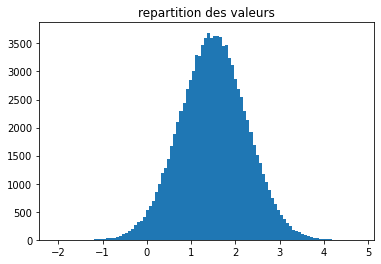

In [6]:
moyenne = 1.5
sigma = 0.75
x = []
for i in range(100000): # 100000 tirages
    x.append(rd.normalvariate(moyenne,sigma))
plt.hist(x,bins=100) # pour le tracé d'histogramme voir la partie concernée
plt.title("repartition des valeurs")
plt.show()

In [7]:
# Calcul de moyenne
print("moyenne donnée: ", moyenne)
print("moyenne tirage: ", sum(x)/len(x))

moyenne donnée:  1.5
moyenne tirage:  1.498740561361804


L'écart type $\sigma_{n - 1}$ se calcule d'après: 

$$\sigma_{n-1} = \sqrt{\frac{1}{n-1}\sum_{i = 1}^{n}{\left(X_i - \bar{X}\right)}^2} = \sqrt{\frac{1}{n-1}\sum_{i = 1}^{n}{{X_i}^2} - \frac{n}{n-1}\bar{X}^2}$$


C'est la deuxième forme que l'on utilise ci-dessous pour le calculer. On aurait pu tout aussi bien utiliser la première forme car les deux formes mènent au même résultat.


In [11]:
# Calcul écart type
print("ecart type donné: ", sigma)

somme = 0
for element in x:
    somme += element**2
sigma_n_moins_un = (1/(len(x)-1) * somme - len(x)/(len(x)-1) * (sum(x)/len(x))**2)**0.5

print("ecart type tirage: ",sigma_n_moins_un)

ecart type donné:  0.75
ecart type tirage:  0.7489242277129962


Une valeur est considérée comme correcte lorsqu'elle se situe dans l'intervalle $\left[\bar{X} - 2\sigma , \bar{X} + 2\sigma \right]$ qui correspond à 95% des tirages aléatoires dans le cas d'une loi normale. Si on veut un intervalle de confiance à 99%, il faut prendre l'intervalle $\left[\bar{X} - 3\sigma , \bar{X} + 3\sigma \right]$

In [9]:
# Mesure du pourcentage de valeurs à 
# moyenne +- sigma
# moyenne +- 2 sigma
# moyenne +- 3 sigma
unsigma = 0
deuxsigma = 0
troissigma = 0
for el in x:
    if moyenne - sigma < el < moyenne + sigma:
        unsigma += 1
    if moyenne - 2*sigma < el < moyenne + 2*sigma:
        deuxsigma += 1
    if moyenne - 3*sigma < el < moyenne + 3*sigma:
        troissigma += 1

print("à +- 1 sigma",100*unsigma/len(x),"%")
print("à +- 2 sigma",100*deuxsigma/len(x),"%")
print("à +- 3 sigma",100*troissigma/len(x),"%")

à +- 1 sigma 68.377 %
à +- 2 sigma 95.441 %
à +- 3 sigma 99.742 %


Le z-score représente le rapport entre l'écart (en valeur absolue) entre la valeur obtenue et la moyenne des valeurs et l'écart type. Si ce z-score est inférieur à 2, on considère que la valeur est de bonne qualité (on est à $\pm\ 2 \sigma$ de la moyenne).

In [10]:
def zscore(valeur,moyenne,sigma):
    return abs(valeur - moyenne)/sigma

# Par exemple
print("valeur: ",0.28, "z-score: ",zscore(0.28,moyenne,sigma))
# On a bien 1.5 - 2*0.75 < 0.28 < 1.5 + 2*0.75 d'où un zscore < 2

print("valeur: ", 3.6, "z-score: ",zscore(3.6,moyenne,sigma))
# On a 1.5 + 2*0.75 < 3.6 donc zscore > 2


valeur:  0.28 z-score:  1.6266666666666667
valeur:  3.6 z-score:  2.8000000000000003


# Exercice 
Un constructeur de composants électroniques indique qu'une résistance est construite avec une valeur de $R = 1000\ \Omega$ et une tolérance de 5%. La valeur de $1000\ \Omega$ est la valeur de référence et on assimile la tolérance à l'écart type.
1. Ecrire une fonction **alea(R, sigma)** qui prend comme arguments la valeur de R et la tolérance données et qui renvoie une valeur de résistance correspondant au choix aléatoire d'une résistance parmi un grand nombre de composants.
2. Construire une liste de 8 valeurs (obtenues à l'aide de la fonction alea) afin de simuler les valeurs de R distribuées à chaque binôme lors d'un TP.
3. Ecrire une fonction **moyenne(liste)** et une fonction **sigma(liste)** qui renvoient respectivement la moyenne et $\sigma_{n-1}$ pour la série de valeurs contenue dans la liste. Utiliser alors ces fonctions afin de calculer moyenne et $\sigma_{n-1}$ pour la série de valeurs de la question 2.
4. Construire la liste des z-score pour chaque valeur de cette série.

In [11]:
# 1.
def alea(R, sigma):
    # A compléter
    
    
# test de la fonction
R = 1000
sigma = 50
alea(R, sigma)

In [12]:
# 2.


In [14]:
# 3.
def moyenne(liste):
    # à compléter
    
def sigma(liste):
    # à compléter
    
    

In [15]:
# 4.
